In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv(r'C:\Users\khang\Downloads\Medicine_dataset.csv')

In [ ]:
df.head(6)

,DRUG NAME,RATING,REVIEWS
0,Metformin,5.9,253
1,Januvia,4.6,126
2,Tradjenta,3.1,60
3,Sitagliptin,4.7,135
4,Onglyza,5.9,15
5,Mounjaro,6.1,94


In [ ]:
df.shape

(160, 3)

In [ ]:
df.describe()

,RATING,REVIEWS
count,160.000000,160.00000
mean,4.649375,55.36250
std,3.105564,145.96702
min,0.000000,0.00000
25%,2.125000,1.00000
50%,5.050000,5.00000
75%,6.850000,24.25000
max,10.000000,923.00000


In [ ]:
#find duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
155    False
156    False
157    False
158    False
159    False
Length: 160, dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   DRUG NAME  160 non-null    object 
 1   RATING     160 non-null    float64
 2   REVIEWS    160 non-null    int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 3.9+ KB


In [ ]:
df.isnull().sum()


DRUG NAME    0
RATING       0
REVIEWS      0
dtype: int64

In [ ]:
#Data Visualization

In [ ]:
#importing dependencies

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

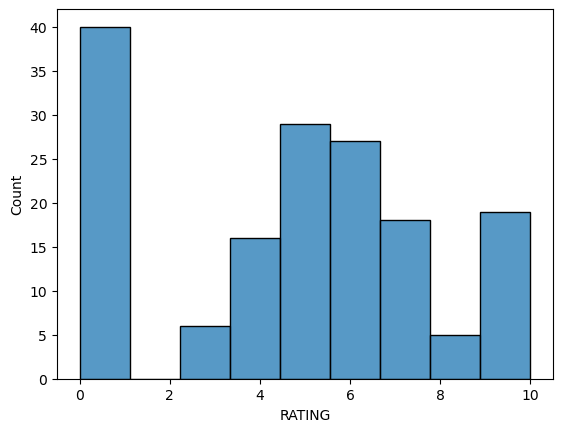

In [ ]:
sns.histplot(x='RATING',data=df)
plt.show()

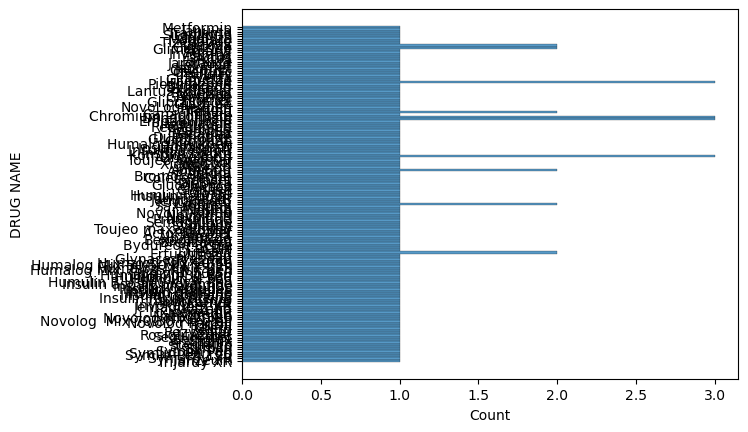

In [ ]:
sns.histplot(y='DRUG NAME',data=df)
plt.show()

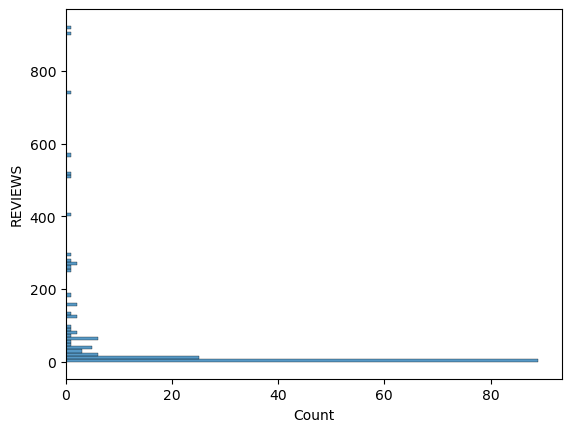

In [ ]:
sns.histplot(y='REVIEWS',data=df)
plt.show()

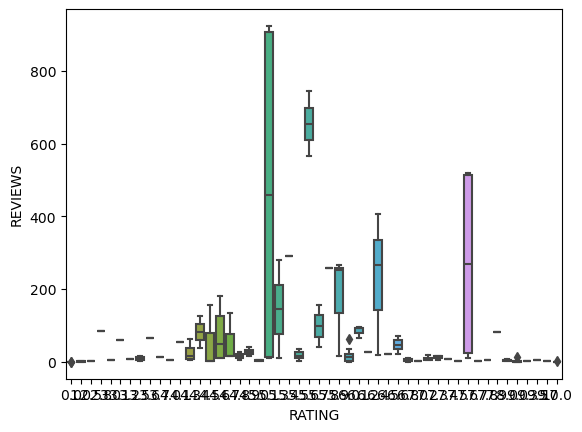

In [ ]:
sns.boxplot(x='RATING',y='REVIEWS',data=df,)
plt.show()

In [ ]:
#calculate the mean rating for each medicine
medicine_means=df.groupby('DRUG NAME')['RATING'].mean()

In [ ]:
print(medicine_means)

DRUG NAME
Acarbose        4.5
ActoPlus Met    7.2
Actos           4.9
Adlyxin         0.0
Admelog         3.0
               ... 
Trulicity       5.1
Victoza         7.6
Welchol         4.0
Xigduo XR       7.3
Xultophy        9.3
Name: RATING, Length: 146, dtype: float64


In [ ]:
#Merge the medicine means with the original dataframe
df=pd.merge(df,medicine_means,on='DRUG NAME',suffixes=('','_MEAN'))

In [ ]:
df.head(40)

,DRUG NAME,RATING,REVIEWS,RATING_MEAN
0,Metformin,5.9,253,5.900000
1,Januvia,4.6,126,4.600000
2,Tradjenta,3.1,60,3.100000
3,Sitagliptin,4.7,135,4.700000
4,Onglyza,5.9,15,5.900000
5,Mounjaro,6.1,94,6.100000
6,Tizepatide,6.1,95,6.100000
7,Victoza,7.6,510,7.600000
8,Glipizide,6.1,67,4.800000
9,Glipizide,3.5,2,4.800000


In [ ]:
#calculate the deviation of each rating from the medicine mean
df['deviation']=df['RATING']-df['RATING_MEAN']

In [ ]:
df['deviation'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: deviation, dtype: float64

In [ ]:
#calculate the weighted average deviation for each medicine based on the reviews
weighted_deviations=df.groupby(['DRUG NAME'])\
.apply(lambda x:(x['deviation'] * x['REVIEWS']).sum() / x['REVIEWS'].abs().sum())

C:\Users\khang\AppData\Local\Temp\ipykernel_10116\209153295.py:3: RuntimeWarning: invalid value encountered in scalar divide
  .apply(lambda x:(x['deviation'] * x['REVIEWS']).sum() / x['REVIEWS'].abs().sum())


In [ ]:
#convert the result to a pandas dataframe
recommendations=weighted_deviations.reset_index()

In [ ]:
recommendations.columns=['DRUG NAME','score']

In [ ]:
recommendations.head(-5)

,DRUG NAME,score
0,Acarbose,0.0
1,ActoPlus Met,0.0
2,Actos,0.0
3,Adlyxin,NaN
4,Admelog,0.0
...,...,...
136,Toujeo Solostar,0.0
137,Toujeo max solostar,NaN
138,Tradjenta,0.0
139,Tresiba,0.0


In [ ]:
#sort the recommendations by score in descending order
recommendations=recommendations.sort_values(by='score',ascending=False)

In [ ]:
#Print the top 10 recommendations
print("Top 10 recommended medicines:")
for _, row in recommendations.head(50).iterrows():
    print(f"{row['DRUG NAME']},score {row['score']}")

Top 10 recommended medicines:
Glipizide,score 1.2246376811594204
Alogliptin,score 0.8800000000000001
Linagliptin,score 0.8666666666666666
Dapagliflozin,score 0.8256262042389207
Glimepiride,score 0.51986301369863
Pioglitazone,score 0.47816091954022966
Canagliflozin,score 0.43992537313432856
Saxagliptin,score 4.440892098500626e-16
Novolog  Mix 70/30 FlexPen,score 0.0
Novolog Mix 70/30,score 0.0
Onglyza,score 0.0
NovoLogflexpen,score 0.0
Oseni,score 0.0
Novolog,score 0.0
Novolin R,score 0.0
Novolin N,score 0.0
Novolin 70/30,score 0.0
Acarbose,score 0.0
Nateglinide,score 0.0
Nesina,score 0.0
Mounjaro,score 0.0
Miglitol,score 0.0
Metformin,score 0.0
Liraglutide,score 0.0
Levemir,score 0.0
Lantus solostar,score 0.0
Lantus,score 0.0
Kombiglyze XR,score 0.0
Kazano,score 0.0
Jentadueto XR,score 0.0
Jentadueto,score 0.0
Ozempic,score 0.0
Riomet,score 0.0
Pramlintide,score 0.0
Prandin,score 0.0
Xigduo XR,score 0.0
Welchol,score 0.0
Victoza,score 0.0
Trulicity,score 0.0
Tresiba,score 0.0
Tradjenta

In [ ]:
#Print the top 10 recommendations
print("Top 10 recommended medicines:")
for _, row in recommendations.head(10).iterrows():
    print(f"{row['DRUG NAME']}")

Top 10 recommended medicines:
Glipizide
Alogliptin
Linagliptin
Dapagliflozin
Glimepiride
Pioglitazone
Canagliflozin
Saxagliptin
Novolog  Mix 70/30 FlexPen
Novolog Mix 70/30
